In [0]:
import matplotlib.pyplot as plt # helpful for plotting
import numpy as np 
import os, sys
from google.colab import files # google colab upload bar

In [2]:
uploaded = files.upload()  # upload your files as uploaded

Saving linear_data.csv to linear_data.csv


In [3]:
# load in the data 
data = np.loadtxt('linear_data.csv', delimiter=',')
print(data.shape)

(1000, 3)


In [4]:
labels = data[:, -1] # take the labels from the data
print(labels.shape)

(1000,)


In [0]:
data = data[:, 0:2] # take off the labels from data for training

In [6]:
print(data.shape)

(1000, 2)


In [0]:
positive_x = data[labels == 1, 0]  # get the x coordinates of all data examples with label 1
positive_y = data[labels == 1, 1] # get the y coordinates of all data examples with label 1

In [0]:
negative_x = data[labels == 0, 0]  # get the rows of column 1 where the label equals 0
negative_y = data[labels == 0, 1] #get the rows of column 2 where the label equals 0

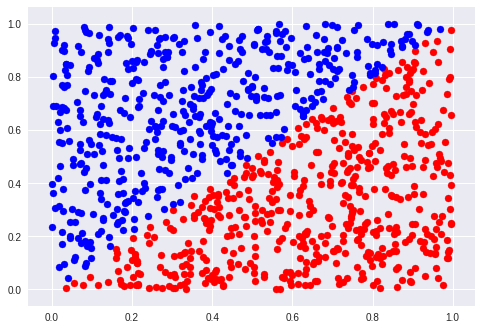

In [9]:
plt.scatter(positive_x, positive_y, c='r') # plot the positive samples given x and y values
plt.scatter(negative_x, negative_y, c='b')  # plot the negative samples given the x and y coordinates 
plt.show()

In [10]:

data = np.concatenate((data, ), 1) # add the column to the data
print(data.shape)

(1000, 2)


In [0]:
weights = np.random.randn(2, ) * 0.01 # make small random weights

In [12]:
print(weights)

[-0.00618611  0.00061499]


In [0]:
lr = 0.05 # learning rate --- usually between 1e-5 and .1

In [0]:
errors = []  # make an empty list for the errors

In [0]:
# have i count up to the number of samples in the dataset, 
# and each time, do what the indented lines below say
for i in range(data.shape[0]):
  
  # forward pass
  x = data[i, :]  # take out the ith sample
  y = labels[i]  # take out the label for the ith sample
  out = np.dot(x, weights)  # get the weighted sum for this example
  out = np.round(out)  # round the output to 1 if its greater than .5 or 0 otherwise
  
  # backward pass 
  error = y - out # difference between network's output and actual label
  errors.append(error) # add new error to end of errors 
  
  weights += lr * (error * x)  # update the weights 

In [16]:
print(weights)

[ 1.33317018 -0.58820089]


In [0]:
# send the whole dataset through the perceptron
all_out = np.round(np.matmul(data, weights))

In [18]:
correct = (all_out == labels) # compare outputs to labels elementwise
print(np.mean(correct))  # print the accuracy on the training set

0.821


In [0]:
# get all of the data samples where the perceptron pridicted 0
pred_neg = data[all_out == 0, :]

# get all of the data samples where the perceptron predicted 1
pred_pos = data[all_out == 1, :]

In [0]:
# calculate the difference between each label and its respective ouptut
diff = labels - all_out

# take the samples out of data where the difference is not 0 (the ones it got wrong.)
wrong_pred = data[diff != 0, :]

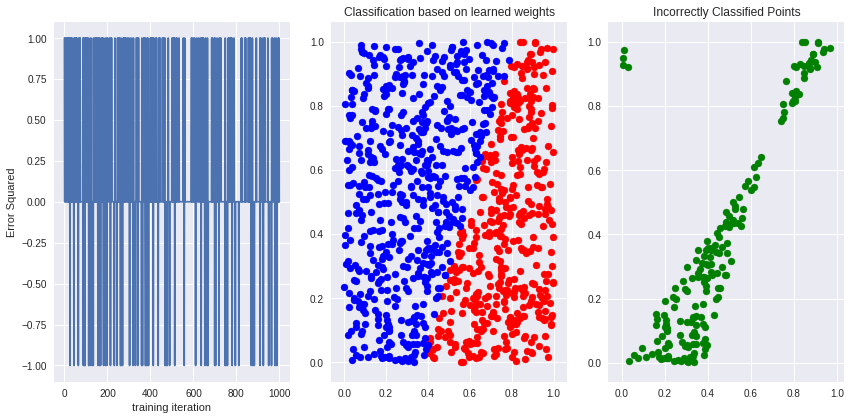

In [21]:
# create a figure
fig = plt.figure(figsize=(12, 6))

# create three subplots within the figure in a row
subplot1 = fig.add_subplot(131)
subplot2 = fig.add_subplot(132)
subplot3 = fig.add_subplot(133)

# set the xlabels and ylabels for subplot 1
subplot1.set_xlabel('training iteration')
subplot1.set_ylabel('Error Squared')

# tell subplot 1 what it's supposed to show
subplot1.plot(errors)

# set just a title for subplot 2
subplot2.set_title('Classification based on learned weights')

# tell subplot 2 to make a scatter plot where the ones predicted to be
# 1 by the perceptron are colored red and their x and y locations
subplot2.scatter(pred_pos[:, 0], pred_pos[:, 1], c='r')

# tell subplot 2 to also make the negative predictions blue and plot them
# according to their x and y values
subplot2.scatter(pred_neg[:, 0], pred_neg[:, 1], c='b')

# make a title for the third subplot
subplot3.set_title('Incorrectly Classified Points')

# make a scatter plot using the ones it got wrong
subplot3.scatter(wrong_pred[:, 0], wrong_pred[:, 1], c='g')

# use this when there are a lot of subplots/words...sometimes doesn't show right otherwise
plt.tight_layout()
plt.show() # show the plot

### Homework 2

Rerun this notebook and retrain the perceptron without a bias and print the accuracy of the network and the graphs above. Finally, explay WHY your results without the bias were very different or very similar to the results with the bias unit based on what the purpose of the bias unit is and the distribution of this dataset. Write at least 3 full sentences.

In [0]:
#The result was quite similar. This may seem strange, because biases are what
#helps the network learn what it did wrong through a regression model, but 
#because of the lack of layers, the bias isn't needed to shift the model 
#and the weights are able to do a fine job of sorting the data out. 